<a href="https://colab.research.google.com/github/Soumyaraj-Biswal/sentiment-analysis/blob/master/Tensorflow_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!nvidia-smi

Fri May 29 03:34:19 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [1]:

try:
  !pip uninstall tb-nightly tensorboardX tensorboard
  !pip install tf.nightly
except Exception:
  pass
import tensorflow as tf

import os
import datetime
import tensorflow_datasets as tfds

%load_ext tensorboard

Uninstalling tensorboard-2.2.1:
  Would remove:
    /usr/local/bin/tensorboard
    /usr/local/lib/python3.6/dist-packages/tensorboard-2.2.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorboard/*
Proceed (y/n)? y
  Successfully uninstalled tensorboard-2.2.1
     |████████████████████████████████| 525.1MB 32kB/s 
     |████████████████████████████████| 2.9MB 52.3MB/s 
     |████████████████████████████████| 460kB 47.2MB/s 


In [0]:

from __future__ import absolute_import, division, print_function, unicode_literals

In [3]:
import pkg_resources

for entry_point in pkg_resources.iter_entry_points('tensorboard_plugins'):
  print(entry_point.dist)

tensorboard 2.2.1
tensorboard-plugin-wit 1.6.0.post3


In [0]:
!rm -r /usr/local/lib/python3.6/dist-packages/tensorboardcolab-0.0.22.dist-info

In [0]:
print(tf.__version__)

2.3.0-dev20200522


In [0]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
dataset, info = tfds.load('amazon_us_reviews/Mobile_Electronics_v1_00', with_info=True)
train_dataset = dataset['train']

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0.incomplete09QVFC/amazon_us_reviews-train.tfrecord


ERROR:absl:Statistics generation doesn't work for nested structures yet



Dataset amazon_us_reviews downloaded and prepared to /root/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0. Subsequent calls will reuse this data.


In [0]:
dataset1, info1 = tfds.load('amazon_us_reviews/Books_v1_00', with_info=True)
train_dataset1 = dataset1['train']

/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [0]:
info1

tfds.core.DatasetInfo(
    name='amazon_us_reviews',
    version=0.1.0,
    description='Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews.

Over 130+ million cus

In [0]:
print(train_dataset)

<DatasetV1Adapter shapes: {data: {customer_id: (), helpful_votes: (), marketplace: (), product_category: (), product_id: (), product_parent: (), product_title: (), review_body: (), review_date: (), review_headline: (), review_id: (), star_rating: (), total_votes: (), verified_purchase: (), vine: ()}}, types: {data: {customer_id: tf.string, helpful_votes: tf.int32, marketplace: tf.string, product_category: tf.string, product_id: tf.string, product_parent: tf.string, product_title: tf.string, review_body: tf.string, review_date: tf.string, review_headline: tf.string, review_id: tf.string, star_rating: tf.int32, total_votes: tf.int32, verified_purchase: tf.int64, vine: tf.int64}}>


In [0]:
len(list(train_dataset))

104975

In [0]:
BUFFER_SIZE = 30000
BATCH_SIZE = 128

In [0]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE, reshuffle_each_iteration=False)
train_dataset1 = train_dataset1.shuffle(BUFFER_SIZE, reshuffle_each_iteration=False)
len(list(train_dataset))

In [0]:
for reviews in train_dataset.take(2):
  print(reviews)

{'data': {'customer_id': <tf.Tensor: shape=(), dtype=string, numpy=b'20980074'>, 'helpful_votes': <tf.Tensor: shape=(), dtype=int32, numpy=0>, 'marketplace': <tf.Tensor: shape=(), dtype=string, numpy=b'US'>, 'product_category': <tf.Tensor: shape=(), dtype=string, numpy=b'Mobile_Electronics'>, 'product_id': <tf.Tensor: shape=(), dtype=string, numpy=b'B00D1847NE'>, 'product_parent': <tf.Tensor: shape=(), dtype=string, numpy=b'274617424'>, 'product_title': <tf.Tensor: shape=(), dtype=string, numpy=b'Teenage Mutant Ninja Turtles Boombox CD Player with Text Display, AM/FM Stereo Radio, Repeat Function'>, 'review_body': <tf.Tensor: shape=(), dtype=string, numpy=b'Does not work'>, 'review_date': <tf.Tensor: shape=(), dtype=string, numpy=b'2015-01-09'>, 'review_headline': <tf.Tensor: shape=(), dtype=string, numpy=b'One Star'>, 'review_id': <tf.Tensor: shape=(), dtype=string, numpy=b'R1OVS0D6SEXPW7'>, 'star_rating': <tf.Tensor: shape=(), dtype=int32, numpy=1>, 'total_votes': <tf.Tensor: shape=(

In [0]:
for reviews in train_dataset.take(10):
  review_text = reviews['data']
  print(review_text.get('review_body').numpy())
  print(review_text.get('star_rating'))
  if tf.where(review_text.get('star_rating')==3,1,0).numpy() == 1:
    print('neutral = 0')
  elif tf.where(review_text.get('star_rating')>3,1,0).numpy() == 1:
    print('positive = 1')
  else:
    print('negative =-1')

b'Does not work'
tf.Tensor(1, shape=(), dtype=int32)
negative =-1
b'This is a great wiring kit i used it to set up my Pyle 2000 watt amp to 2 alpine subs and worked just fine. im not sure about the power cord and its length because my battery is in the back but the ground cord is a bit short and thats its only flaw and that why i gave it 4 stars. great kit'
tf.Tensor(4, shape=(), dtype=int32)
positive = 1
b'It works great so much faster than USB charger..Buy it! You will be glad you did!'
tf.Tensor(5, shape=(), dtype=int32)
positive = 1
b'This product was purchased to hold a monitor on a desk, which is connected to a security camera at a door of our business. It serves our purpose perfectly.'
tf.Tensor(5, shape=(), dtype=int32)
positive = 1
b"it works but it has really bad sound quality. the bass doesn't work almost at all"
tf.Tensor(3, shape=(), dtype=int32)
neutral = 0
b"Excellent product !!!<br />Easy to install and performs flawlessly.<br />Video and audio is clear and GPS map pinp

In [0]:
tokenizer =  tfds.features.text.Tokenizer()

vocabulary_set = set()
for _,reviews in train_dataset.enumerate():
  review_text=reviews['data']
  reviews_tokens = tokenizer.tokenize(review_text.get('review_body').numpy())
  vocabulary_set.update(reviews_tokens)



73738

In [0]:

for _,reviews in train_dataset1.enumerate():
  review_text=reviews['data']
  reviews_tokens = tokenizer.tokenize(review_text.get('review_body').numpy())
  vocabulary_set.update(reviews_tokens)

vocab_size = len(vocabulary_set)
vocab_size

In [0]:
encoder = tfds.features.text.TokenTextEncoder(vocabulary_set)
encoder.save_to_file('/content/drive/My Drive/test/encoder')
print(vocabulary_set)
print(encoder)

{'intention', 'significant', '8400', 'Quarts', 'grippy', 'WONT', '221g', 'Shortened', 'poket', 'cow', 'languished', 'Yankees', 'sterero', 'Fright', 'Dremel_100', '5939', 'scrappy', 'maxing', 'COVERING', 'B002QZRX16', 'ähnlich', 'blueparrot', 'lot', 'Gonna', 'iris', 'returnig', 'radically', 'B00005RHPD', 'Rattay', 'besignificantly', 'modas', 'Elec', 'momentum', 'Presumably', 'bk2', 'availablility', 'cowpie', 'zonas', 'desccribed', 'chipping', 'company', 'windw', 'sail', 'GNote', 'nuts', 'mico', 'Undone', 'sweep', 'Faderlube', '206B', 'homemade', '17W', 'Tanita', 'pug', 'situp', 'ottterbox', 'streamium', 'curl', 'approperiate', 'fórums', 'Condo', 'Waterproofing', 'treadmill', 'acrobatics', 'respectively', 'FUSED', 'notecards', 'measuring', 'sacar', 'knub', 'kpt445', 'photographing', 'sennihauser', 'peaceful', 'B007FHW8EW', 'NIGHTMARES', 'Elph', 'aomething', 'Not', 'Highs', 'closers', 'somebody', 'Victoria', 'wet', 'soud', 'reveals', 'lose', 'AT440MLa', 'zrx', 'whire', 'Gillson', 'IOS7', 

In [0]:
for reviews in train_dataset.take(5):
  review_text = reviews['data']
  print(review_text.get('review_body').numpy())
  encoded_example = encoder.encode(review_text.get('review_body').numpy())
  print(encoded_example)


b'As advertised'
[38442, 35680]
b'My daughter is so happy with the hard case for her ipod!  I received it on the day it was estimated for delivery.  I have no complaints!'
[10741, 4690, 56539, 53714, 19618, 32993, 41674, 59182, 23821, 31185, 44598, 51136, 42459, 38406, 65791, 73137, 41674, 33381, 65791, 6298, 49805, 31185, 70228, 42459, 19236, 3291, 63197]
b'Poor quality'
[4807, 36830]
b'2nd week of use, one of the bottom plastic pieces that hold the phone up, snapped off. i\'m not rough with it. around the same time, the cable stopped working, so in order to hear music you have to pinch the cable going into the phone while driving. i just held my phone in my lap to do this, but really, so unsafe. never again.  it either doesn\'t grip the iphone 4 or it \\\\"death grips\\\\"...giving you zero service. Ungrip it, and the bars start to come back. Will not charge and play FM simultaneously. about 25% of the time when I plug in the charger it says \\\\"this device not supported b y iphone 

In [0]:
for index in encoded_example:
  print('{} ----> {}'.format(index, encoder.decode([index])))

20345 ----> There
63510 ----> is
12579 ----> a
27015 ----> couple
20838 ----> good
17566 ----> things
68247 ----> about
59015 ----> this
67582 ----> item
72378 ----> First
39196 ----> the
20381 ----> case
53122 ----> got
57236 ----> to
65488 ----> my
45100 ----> house
59087 ----> way
56194 ----> before
51343 ----> expected
24641 ----> Also
39196 ----> the
18549 ----> pictures
12410 ----> on
39196 ----> the
20381 ----> case
57484 ----> look
16569 ----> great
67320 ----> The
20777 ----> not
43839 ----> so
20838 ----> good
36759 ----> thing
63510 ----> is
39196 ----> the
53602 ----> cases
57868 ----> edges
25541 ----> has
50330 ----> paint
42038 ----> whatever
14778 ----> chipping
56812 ----> off
40144 ----> It
55799 ----> feels
62122 ----> peculiar
38698 ----> but
25028 ----> we
1932 ----> can
16514 ----> get
60223 ----> over
46205 ----> that
68773 ----> Overall
60345 ----> its
12579 ----> a
18159 ----> pretty
20838 ----> good
20381 ----> case
30919 ----> D
40144 ----> It
57482 ----> s
2

In [0]:
def encode(text_tensor,label_tensor):
  encoded_text = encoder.encode(text_tensor.numpy())
  label=tf.where(label_tensor>3,1,0)
  return encoded_text,label


In [0]:
def encode_map_fn(tensor):
  text = tensor['data'].get('review_body')
  label = tensor['data'].get('star_rating')

  encoded_text, label = tf.py_function(encode,inp=[text, label],Tout=(tf.int64, tf.int32))

  encoded_text.set_shape([None])
  label.set_shape([])
  return encoded_text,label

In [0]:
ar_encoded_data = train_dataset.map(encode_map_fn)
ar_encoded_data1 = train_dataset1.map(encode_map_fn)

In [0]:
for f0,f1 in ar_encoded_data.take(10):
  print(f0)
  print(f1)

tf.Tensor([21146 19087   175], shape=(3,), dtype=int64)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(
[22953 23787 65624 65968 19762 68625  5141  4316 70390 52553 44135 47744
 45502 43801 56426 68057 23387 52553 48419  1186 56753 28666 10498 16016
 46624 33238 19087 66348 20083 51734 21753 42558 28666 41839 59491 44127
 45502 50071 23787  4622 51734 66256 15572 51734 49041 42558 23787 65624
 41229  2804 28666 18825 41839 40397 19649 28666 46977 21544  5141  7511
 70390  1104  1568 65968 68625], shape=(65,), dtype=int64)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(
[71431 47370 65968 50084 57084 59976 53088 53716  3958  2681 70390 65488
 23401  5060 10883 44194 16948], shape=(17,), dtype=int64)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(
[22953 27286  1940 40347 52553  3804 65624 68881 71827 65624 69630 29287
 23787 61187 52553 65624 70493 32454 68182 65624 63355  1135 47602 48896
 71431 63529 47602 27610 27648], shape=(29,), dtype=int64)
tf.Tensor(1, shape=(), dtype=int32)
tf.Ten

In [0]:
TAKE_SIZE = 10000

train_data = ar_encoded_data.skip(TAKE_SIZE).shuffle(BUFFER_SIZE)
train_data = train_data.padded_batch(BATCH_SIZE)

test_data = ar_encoded_data.take(TAKE_SIZE)
test_data = test_data.padded_batch(BATCH_SIZE)

train_data1 = ar_encoded_data1.skip(TAKE_SIZE).shuffle(BUFFER_SIZE)
train_data1 = train_data1.padded_batch(BATCH_SIZE)

test_data1 = ar_encoded_data1.take(TAKE_SIZE)
test_data1 = test_data1.padded_batch(BATCH_SIZE)

In [0]:
vocab_size +=1

In [0]:
sample_text, sample_labels = next(iter(test_data))

sample_text[0], sample_labels[0]

(<tf.Tensor: shape=(485,), dtype=int64, numpy=
 array([38442, 35680,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,  

In [0]:
for f0,f1 in test_data.take(10):
  print(tf.unique_with_counts(f1)[2].numpy())

[46 82]
[39 89]
[85 43]
[37 91]
[95 33]
[86 42]
[88 40]
[44 84]
[42 86]
[36 92]


In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 128))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))
for units in [64,64]:
  model.add(tf.keras.layers.Dense(units,activation='relu'))
  model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))

In [0]:
!rm -r /tmp/logs/
#tf.profiler.experimental.stop()

In [0]:
logdir = os.path.join("/tmp/logs", datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath='/content/drive/My Drive/test/sentiment_analysis.hdf5',
                                                 verbose=1,save_best_only=True)
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [0]:
history = model.fit(train_data, epochs=4, validation_data=test_data,callbacks=[tensorboard_callback,checkpointer])

Epoch 1/4
  2/742 [..............................] - ETA: 12:03 - loss: 0.6929 - accuracy: 0.3633WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.5382s vs `on_train_batch_end` time: 1.3858s). Check your callbacks.


742/742 [==============================] - ETA: 0s - loss: 0.3528 - accuracy: 0.8393
Epoch 00001: val_loss improved from inf to 0.29194, saving model to /content/drive/My Drive/sentiment_analysis.hdf5
742/742 [==============================] - 287s 386ms/step - loss: 0.3528 - accuracy: 0.8393 - val_loss: 0.2919 - val_accuracy: 0.8716
Epoch 2/4
742/742 [==============================] - ETA: 0s - loss: 0.2400 - accuracy: 0.9000
Epoch 00002: val_loss improved from 0.29194 to 0.28454, saving model to /content/drive/My Drive/sentiment_analysis.hdf5
742/742 [==============================] - 288s 389ms/step - loss: 0.2400 - accuracy: 0.9000 - val_loss: 0.2845 - val_accuracy: 0.8816
Epoch 3/4
742/742 [==============================] - ETA: 0s - loss: 0.2119 - accuracy: 0.9137
Epoch 00003: val_loss did not improve from 0.28454
742/742 [==============================] - 285s 384ms/step - loss: 0.2119 - accuracy: 0.9137 - val_loss: 0.2967 - val_accuracy: 0.8870
Epoch 4/4
742/742 [==============

In [0]:
history = model.fit(train_data1, epochs=4, validation_data=test_data1,callbacks=[tensorboard_callback,checkpointer])

In [0]:
model.save('/content/drive/My Drive/test/final_sentiment_analysis.hdf5')

In [0]:
eval_loss, eval_acc = model.evaluate(test_data)
print('\nEval loss: {:.3f}, Eval accuracy: {:.3f}'.format(eval_loss, eval_acc))

79/79 [==============================] - 17s 220ms/step - loss: 0.2815 - accuracy: 0.8846

Eval loss: 0.281, Eval accuracy: 0.885


In [0]:
for f0,f1 in test_data.take(1):
  print(f1)
  print(model.predict(f0))

tf.Tensor(
[1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0
 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1
 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0
 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1], shape=(128,), dtype=int32)
[[ 2.6303828 ]
 [ 4.078045  ]
 [-6.0721602 ]
 [-4.538443  ]
 [ 3.3956978 ]
 [ 1.322756  ]
 [ 0.13107398]
 [ 5.3670373 ]
 [-5.0748506 ]
 [ 5.5995946 ]
 [-0.7911997 ]
 [-4.5043526 ]
 [ 4.924636  ]
 [ 4.123593  ]
 [ 1.9767816 ]
 [ 3.7496705 ]
 [ 0.9592243 ]
 [-2.332428  ]
 [-4.4399257 ]
 [-0.77570516]
 [ 4.3133187 ]
 [-1.9872684 ]
 [ 2.8992722 ]
 [ 4.6859202 ]
 [-0.91334164]
 [ 3.7922506 ]
 [ 4.9630075 ]
 [ 3.6934917 ]
 [ 4.993608  ]
 [ 1.212656  ]
 [-5.989866  ]
 [ 5.1499248 ]
 [ 3.358669  ]
 [ 5.106558  ]
 [-0.09378281]
 [ 3.8586085 ]
 [-0.88850284]
 [ 5.32328   ]
 [-3.6859596 ]
 [-5.842761  ]
 [ 4.5862894 ]
 [ 4.995866  ]
 [-4.904423  ]
 [ 2.1328754 ]
 [ 4.0665603 ]
 [-1.6551305 ]
 [ 1.06133

In [0]:
model.layers

In [0]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         9438592   
_________________________________________________________________
bidirectional_3 (Bidirection (None, None, 256)         263168    
_________________________________________________________________
bidirectional_4 (Bidirection (None, None, 128)         164352    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 128)               98816     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

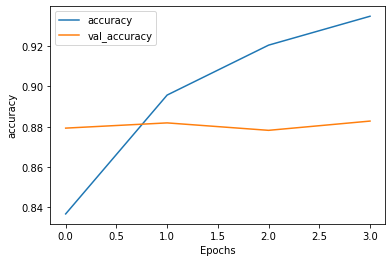

In [0]:
plot_graphs(history, 'accuracy')

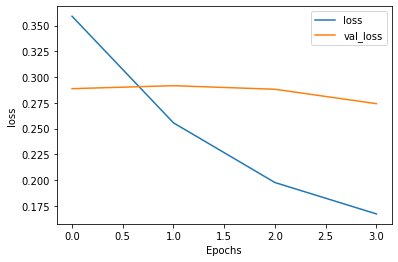

In [0]:
plot_graphs(history, 'loss')

In [0]:

sa_load = tf.keras.models.load_model('/content/drive/My Drive/final_sentiment_analysis.hdf5')
sa_load.load_weights('/content/drive/My Drive/sentiment_analysis.hdf5')


In [0]:
def pad_to_size(vec, size):
  zero = [0] * (size - len(vec))
  vec.extend(zero)
  return vec

In [0]:
def predict_fn(pred_text):
  encoder = tfds.features.text.TokenTextEncoder({}).load_from_file('/content/drive/My Drive/encoder')
  encoded_pred_text = encoder.encode(pred_text)
  print(encoded_pred_text)
  encoded_pred_text = pad_to_size(encoded_pred_text, 32)
  print(encoded_pred_text)
  encoded_pred_text = tf.cast(encoded_pred_text, tf.float32)
  predictions = sa_load.predict(tf.expand_dims(encoded_pred_text, 0))
  
  if predictions[0]>-2 and predictions[0]<2:
    print('neutral')
  elif predictions[0]>=2:
    print('positive')
  else:
    print('negative')
  return (predictions[0]) 

In [0]:
print(predict_fn("although life or something like it is very much in the mold of feel good movies the cast and director stephen hereks polished direction pour delightfully piquant wine from aged bottles"))

[41950, 30015, 38140, 8003, 61327, 65791, 56539, 16988, 37600, 7952, 41674, 34218, 67113, 20010, 48204, 61359, 41674, 33655, 26306, 62304, 73739, 73739, 59025, 61736, 14365, 32236, 73739, 53083, 58504, 45749, 36202]
[41950, 30015, 38140, 8003, 61327, 65791, 56539, 16988, 37600, 7952, 41674, 34218, 67113, 20010, 48204, 61359, 41674, 33655, 26306, 62304, 73739, 73739, 59025, 61736, 14365, 32236, 73739, 53083, 58504, 45749, 36202, 0]
positive
[4.377317]


In [0]:
print(predict_fn("The movie was okay, I watched it till the end, and it was not that bad"))

[32408, 45466, 6298, 50302, 42459, 10540, 65791, 18539, 41674, 26111, 26306, 65791, 6298, 68949, 49115, 42368]
[32408, 45466, 6298, 50302, 42459, 10540, 65791, 18539, 41674, 26111, 26306, 65791, 6298, 68949, 49115, 42368, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
neutral
[-1.7924047]


In [0]:
print(predict_fn("A neutral sentence is a sentence or statement that is intended to just state facts, in a way that everyone who had been there would be required to agree that it did nothing more than stating the facts. In other words, these statements don’t mean anything. You do not make any stand. It is just reporting the facts which are subjected to approval or disapproval"))

[579, 37594, 64501, 56539, 71573, 64501, 38140, 45134, 49115, 56539, 72306, 12840, 52347, 24136, 19686, 7952, 71573, 11188, 49115, 52193, 7439, 25420, 58109, 41644, 23171, 6633, 69339, 12840, 66875, 49115, 65791, 537, 28027, 1504, 69063, 65076, 41674, 19686, 6389, 337, 42281, 42571, 70257, 62876, 45111, 58405, 43654, 1874, 43638, 68949, 29928, 71612, 53936, 36959, 56539, 52347, 8233, 41674, 19686, 61449, 69018, 30037, 12840, 54478, 38140, 73739]
[579, 37594, 64501, 56539, 71573, 64501, 38140, 45134, 49115, 56539, 72306, 12840, 52347, 24136, 19686, 7952, 71573, 11188, 49115, 52193, 7439, 25420, 58109, 41644, 23171, 6633, 69339, 12840, 66875, 49115, 65791, 537, 28027, 1504, 69063, 65076, 41674, 19686, 6389, 337, 42281, 42571, 70257, 62876, 45111, 58405, 43654, 1874, 43638, 68949, 29928, 71612, 53936, 36959, 56539, 52347, 8233, 41674, 19686, 61449, 69018, 30037, 12840, 54478, 38140, 73739]
neutral
[1.53842]


In [0]:
print(predict_fn("this film is a hoot and is judt as good if not better than much of whats on saturday morning tv especially the pseudo educational stuff we all can't stand"))

[56633, 33980, 56539, 71573, 41366, 26306, 56539, 22217, 30639, 48204, 24579, 68949, 10355, 69063, 37600, 67113, 41812, 73137, 45768, 30811, 41093, 72567, 41674, 13295, 27121, 62891, 19668, 16967, 24619, 45111, 53936]
[56633, 33980, 56539, 71573, 41366, 26306, 56539, 22217, 30639, 48204, 24579, 68949, 10355, 69063, 37600, 67113, 41812, 73137, 45768, 30811, 41093, 72567, 41674, 13295, 27121, 62891, 19668, 16967, 24619, 45111, 53936, 0]
positive
[2.505999]


In [0]:
print(predict_fn("the thing this movie tries to get the audience to buy just won't fly with most intelligent viewers"))

[41674, 64997, 56633, 45466, 17261, 12840, 58099, 41674, 69950, 12840, 42836, 52347, 15290, 45111, 20808, 32993, 52269, 25173, 22030]
[41674, 64997, 56633, 45466, 17261, 12840, 58099, 41674, 69950, 12840, 42836, 52347, 15290, 45111, 20808, 32993, 52269, 25173, 22030, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
neutral
[1.1235669]


In [0]:
print(predict_fn("My husband and I took our son and his girlfriend to somewhere and stayed inthis adorable bungalow! prefect amount of room for us all but a little hectic getting ready to go somewhere with only one bathroom , we quickly figured it out ! highly recomended!!!"))

[10741, 30129, 26306, 42459, 1072, 12630, 41656, 26306, 65287, 53118, 12840, 69262, 26306, 22568, 23109, 49713, 73739, 42767, 41864, 67113, 50968, 31185, 61478, 16967, 57787, 71573, 38350, 15116, 55982, 38636, 12840, 65714, 69262, 32993, 68311, 58843, 29399, 19668, 10409, 59528, 65791, 46759, 10826, 51986]
[10741, 30129, 26306, 42459, 1072, 12630, 41656, 26306, 65287, 53118, 12840, 69262, 26306, 22568, 23109, 49713, 73739, 42767, 41864, 67113, 50968, 31185, 61478, 16967, 57787, 71573, 38350, 15116, 55982, 38636, 12840, 65714, 69262, 32993, 68311, 58843, 29399, 19668, 10409, 59528, 65791, 46759, 10826, 51986]
positive
[4.2390213]


In [0]:
print(predict_fn("I love the fact that a percentage of the sales go to a local charity , that's one of the reason why I decided to order a Medium Fall bouquet for a friend's birthday. However I wasn't very impressed as it looked nothing like the photo on the website. there is no fall color in them."))

[42459, 28886, 41674, 14297, 49115, 71573, 69584, 67113, 41674, 69169, 65714, 12840, 71573, 69538, 48641, 49115, 19315, 58843, 67113, 41674, 22234, 39202, 42459, 18385, 12840, 47385, 71573, 25285, 28045, 73739, 31185, 71573, 25504, 19315, 31130, 21842, 42459, 50602, 45111, 16988, 36379, 30639, 65791, 6248, 28027, 61327, 41674, 59159, 73137, 41674, 69472, 41644, 56539, 3291, 61713, 25891, 7952, 57781]
[42459, 28886, 41674, 14297, 49115, 71573, 69584, 67113, 41674, 69169, 65714, 12840, 71573, 69538, 48641, 49115, 19315, 58843, 67113, 41674, 22234, 39202, 42459, 18385, 12840, 47385, 71573, 25285, 28045, 73739, 31185, 71573, 25504, 19315, 31130, 21842, 42459, 50602, 45111, 16988, 36379, 30639, 65791, 6248, 28027, 61327, 41674, 59159, 73137, 41674, 69472, 41644, 56539, 3291, 61713, 25891, 7952, 57781]
neutral
[-1.7874686]


In [0]:
print(predict_fn("this is the case of a pregnent premise being wasted by a script that takes few chances and manages to insult the intelligence of everyone in the audience"))

[56633, 56539, 41674, 23821, 67113, 71573, 73739, 23111, 14012, 42691, 65853, 71573, 30996, 49115, 25140, 32304, 12900, 26306, 35210, 12840, 16754, 41674, 36211, 67113, 52193, 7952, 41674, 69950]
[56633, 56539, 41674, 23821, 67113, 71573, 73739, 23111, 14012, 42691, 65853, 71573, 30996, 49115, 25140, 32304, 12900, 26306, 35210, 12840, 16754, 41674, 36211, 67113, 52193, 7952, 41674, 69950, 0, 0, 0, 0]
negative
[-3.9054809]


In [0]:
print(predict_fn("The mobile app can be really glitchy and is definitely not user friendly"))

[32408, 72791, 46167, 24619, 6633, 66491, 25938, 26306, 56539, 12549, 68949, 422, 14051]
[32408, 72791, 46167, 24619, 6633, 66491, 25938, 26306, 56539, 12549, 68949, 422, 14051, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
neutral
[-1.7388909]


In [0]:
print(predict_fn("I've had multiple conversations with your customer support team and thet are absolutely worthless . No one has been able to address my issue or process the refund I was promised.")) 

[42459, 53565, 25420, 72388, 56155, 32993, 50695, 69951, 12942, 42780, 26306, 59534, 69018, 54975, 47964, 33581, 58843, 63355, 58109, 3734, 12840, 24738, 71037, 35814, 38140, 9782, 41674, 59238, 42459, 6298, 61432]
[42459, 53565, 25420, 72388, 56155, 32993, 50695, 69951, 12942, 42780, 26306, 59534, 69018, 54975, 47964, 33581, 58843, 63355, 58109, 3734, 12840, 24738, 71037, 35814, 38140, 9782, 41674, 59238, 42459, 6298, 61432, 0]
neutral
[-0.4071922]


In [0]:
print(tf.distribute.get_strategy())

In [0]:
%reload_ext tensorboard

In [0]:
%tensorboard --logdir /tmp/logs

<IPython.core.display.Javascript object>

In [0]:
from tensorboard import notebook
notebook.list()

Known TensorBoard instances:
  - port 6006: logdir /tmp/logs (started 0:00:40 ago; pid 2559)
